<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ?
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation des librairies Pandas et matplotlib
import pandas as pd
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv("sous_nutrition.csv")


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
nombre_colonnes = population.shape[1]
print(f"Le fichier population contient {nombre_colonnes} colonnes.")
print()

#La nature des données dans chacune des colonnes
print(population.dtypes)
print()

#Le nombre de valeurs présentes dans chacune des colonnes
population.count()

Le fichier population contient 3 colonnes.

Zone       object
Année       int64
Valeur    float64
dtype: object



Zone      1416
Année     1416
Valeur    1416
dtype: int64

In [5]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000

population["Valeur"] = population["Valeur"] * 1000



In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le dataset comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le dataset comporte {} colonnes".format(dispo_alimentaire.shape[1]))



Le dataset comporte 15605 observation(s) ou article(s)
Le dataset comporte 18 colonnes


In [10]:
#Consulter le nombre de colonnes
nombre_colonnes_dispo_alimentaire = dispo_alimentaire.shape[1]
print(f"Le fichier de disponibilité alimentaire contient {nombre_colonnes_dispo_alimentaire} colonnes.")

Le fichier de disponibilité alimentaire contient 18 colonnes.


In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes_tonnes = [
    'Aliments pour animaux',
    'Autres Utilisations',
    'Disponibilité intérieure',
    'Exportations - Quantité',
    'Importations - Quantité',
    'Nourriture',
    'Pertes',
    'Production',
    'Semences',
    'Traitement',
    'Variation de stock'
]
dispo_alimentaire[colonnes_tonnes] = dispo_alimentaire[colonnes_tonnes] * 1000000

In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le dataset comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le dataset comporte {} colonnes".format(aide_alimentaire.shape[1]))


Le dataset comporte 1475 observation(s) ou article(s)
Le dataset comporte 4 colonnes


In [16]:
#Consulter le nombre de colonnes
nombre_colonnes_aide_alimentaire = aide_alimentaire.shape[1]
print(f"Le fichier d'aide alimentaire contient {nombre_colonnes_aide_alimentaire} colonnes.")


Le fichier d'aide alimentaire contient 4 colonnes.


In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonnes".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonnes


In [22]:
#Consulter le nombre de colonnes
nombre_colonnes_sous_nutrition = sous_nutrition.shape[1]
print(f"Le fichier de sous-nutrition contient {nombre_colonnes_sous_nutrition} colonnes.")


Le fichier de sous-nutrition contient 3 colonnes.


In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition.fillna(0, inplace=True)




In [25]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)


In [26]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1000000

In [27]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()


,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [28]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

# Convertir la colonne 'Année' en chaîne de caractères
sous_nutrition['Année'] = sous_nutrition['Année'].astype(str)

# Séparer la colonne 'Année' en une liste d'années
sous_nutrition['Année'] = sous_nutrition['Année'].str.split('-')

# Extraire la première année de l'intervalle et ajouter 1 pour obtenir l'année médiane
sous_nutrition['Année'] = sous_nutrition['Année'].str[0].astype(int) + 1

# Filtrer les tables pour l'année 2017
population_2017 = population[population['Année'] == 2017]
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] == 2017]

# Jointure des tables population et sous_nutrition sur les colonnes 'Année' et 'Zone'
merged_df = pd.merge(population_2017, sous_nutrition_2017, on=['Année', 'Zone'], how='left')

In [29]:
#Affichage du dataset
merged_df


,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0
...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484.0,8000000.0
232,Viet Nam,2017,94600648.0,6500000.0
233,Yémen,2017,27834819.0,0.0
234,Zambie,2017,16853599.0,0.0


In [30]:
# Calcul et affichage du nombre de personnes en état de sous-nutrition
df_personnes_sous_nutri = merged_df.loc[(merged_df['Année'] == 2017), ['Zone', 'Population', 'sous_nutrition']]

# Supprimer les doublons
df_personnes_sous_nutri.drop_duplicates(inplace=True)

# Remplacer les NaN par des 0
df_personnes_sous_nutri = df_personnes_sous_nutri.fillna(0)

# Calcul du nombre de personnes en état de sous-nutrition et du nombre total de personnes
nombre_personnes_sous_nutri_2017 = int(df_personnes_sous_nutri['sous_nutrition'].sum())
nombre_personnes_2017 = int(df_personnes_sous_nutri['Population'].sum())

# Calcul de la proportion de personnes en état de sous-nutrition
Proportion_de_personnes_en_sous_nutri = round((nombre_personnes_sous_nutri_2017 * 100 / nombre_personnes_2017), 2)

# Affichage des résultats
print('Le nombre de personnes total en 2017 est', nombre_personnes_2017)
print('Le nombre de personnes en état de sous-nutrition en 2017 est', nombre_personnes_sous_nutri_2017)
print('La proportion de personnes en état de sous-nutrition en 2017 est', Proportion_de_personnes_en_sous_nutri, '%')


Le nombre de personnes total en 2017 est 7548134111
Le nombre de personnes en état de sous-nutrition en 2017 est 535700000
La proportion de personnes en état de sous-nutrition en 2017 est 7.1 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [31]:
#Combien mange en moyenne un être humain ? Source =>https://www.20minutes.fr/magazine/secoacher-mag/2422167-20131104-de-combien-de-calories-a-t-on-besoin-chaque-jour
calories_homme = 2500
calories_femme = 2000
calories_moyenne_humain = int((calories_homme + calories_femme)/2)
print("Un humain mange en moyenne", calories_moyenne_humain, "calories par jour")

Un humain mange en moyenne 2250 calories par jour


In [32]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
#Filtrage et Sélection :
df_population = population.loc[population['Année']==2017, ['Zone','Population']]
#Réinitialisation de l'Index :
df_population.reset_index(drop=True, inplace=True)
#Fusion des Données :
df_donnees_population_dispo_alim = df_population.merge(dispo_alimentaire, on='Zone', how='left')

In [33]:
#Affichage du nouveau dataframe
df_donnees_population_dispo_alim

,Zone,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,Zimbabwe,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0
15476,Zimbabwe,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0
15477,Zimbabwe,14236595.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,1.12,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0
15478,Zimbabwe,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0


In [34]:
# Création de la colonne 'dispo_kcal' avec le calcul des kcal disponibles mondialement
df_donnees_population_dispo_alim['dispo_kcal'] = (
    df_donnees_population_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'] *
    df_donnees_population_dispo_alim['Population']
)

# Calcul de la somme totale des kcal disponibles dans le monde par jour
somme_calories_dispo_monde_jour = int(df_donnees_population_dispo_alim['dispo_kcal'].sum())

# Affichage du résultat
print(f"Il y a {somme_calories_dispo_monde_jour:,} calories disponibles dans le monde par jour.")

Il y a 20,918,984,627,331 calories disponibles dans le monde par jour.


In [35]:
# Calcul du nombre théorique d'humains pouvant être nourris
nombre_theorique = round(somme_calories_dispo_monde_jour / calories_moyenne_humain)

# Calcul du pourcentage de la population totale pouvant être nourrie
pourcentage_population_nourrie = round((nombre_theorique / nombre_personnes_2017) * 100, 2)

# Affichage des résultats
print("Le nombre d'humains pouvant être nourris est", nombre_theorique)
print("On pourrait nourrir", pourcentage_population_nourrie, "% de la population totale")


Le nombre d'humains pouvant être nourris est 9297326501
On pourrait nourrir 123.17 % de la population totale


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [36]:
#Transfert des données avec les végétaux dans un nouveau dataframe
df_donnees_vegetaux = df_donnees_population_dispo_alim.loc[df_donnees_population_dispo_alim["Origine"]=='vegetale', ['Zone', 'Population', 'Produit', 'Origine',
       'Aliments pour animaux', 'Autres Utilisations',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock', 'dispo_kcal']]


In [37]:
#Calcul du nombre de kcal disponible pour les végétaux
df_donnees_vegetaux['dispo_kcal'] =  df_donnees_vegetaux['Population'] * df_donnees_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)']


In [38]:
# Calcul de la somme des kcal disponibles à partir des végétaux
somme_calories_vegetaux = int(df_donnees_vegetaux['dispo_kcal'].sum())

# Calcul du nombre théorique d'humains pouvant être nourris avec les végétaux
nombre_theorique_vegetaux = round(somme_calories_vegetaux / calories_moyenne_humain)

# Calcul de la proportion par rapport à la population totale
proportion_par_rapport_population_total = round((nombre_theorique_vegetaux / nombre_personnes_2017) * 100, 2)

# Affichage des résultats
print("Le nombre d'humains pouvant être nourris avec les végétaux est", nombre_theorique_vegetaux)
print("On pourrait nourrir" ,proportion_par_rapport_population_total, "% de la population totale avec des produits végétaux")

Le nombre d'humains pouvant être nourris avec les végétaux est 7671450761
On pourrait nourrir 101.63 % de la population totale avec des produits végétaux


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [39]:
# Calcul de la disponibilité totale

dispo_total = dispo_alimentaire['Disponibilité intérieure'].sum()

# Affichage de la disponibilité alimentaire totale
print("La disponibilité alimentaire totale est de :", int(dispo_total), "kg")

# Création d'un dictionnaire pour les différentes utilisations
categories = {
    'Alimentation animale': dispo_alimentaire['Aliments pour animaux'].sum() + df_donnees_vegetaux['Aliments pour animaux'].sum(),
    'Alimentation humaine': dispo_alimentaire['Nourriture'].sum(),
    'Pertes': dispo_alimentaire['Pertes'].sum()
}

# Affichage des disponibilités alimentaires pour chaque catégorie
for category, amount in categories.items():
    print(f"La disponibilité alimentaire pour {category.lower()} est de : {int(amount)} kg")

# Calcul des proportions et affichage
for category, amount in categories.items():
    proportion = round((amount / dispo_total) * 100, 2)
    print(f"{proportion}% de la production totale est pour {category.lower()}")

La disponibilité alimentaire totale est de : 9848994000000 kg
La disponibilité alimentaire pour alimentation animale est de : 2486302000000 kg
La disponibilité alimentaire pour alimentation humaine est de : 4876258000000 kg
La disponibilité alimentaire pour pertes est de : 453698000000 kg
25.24% de la production totale est pour alimentation animale
49.51% de la production totale est pour alimentation humaine
4.61% de la production totale est pour pertes


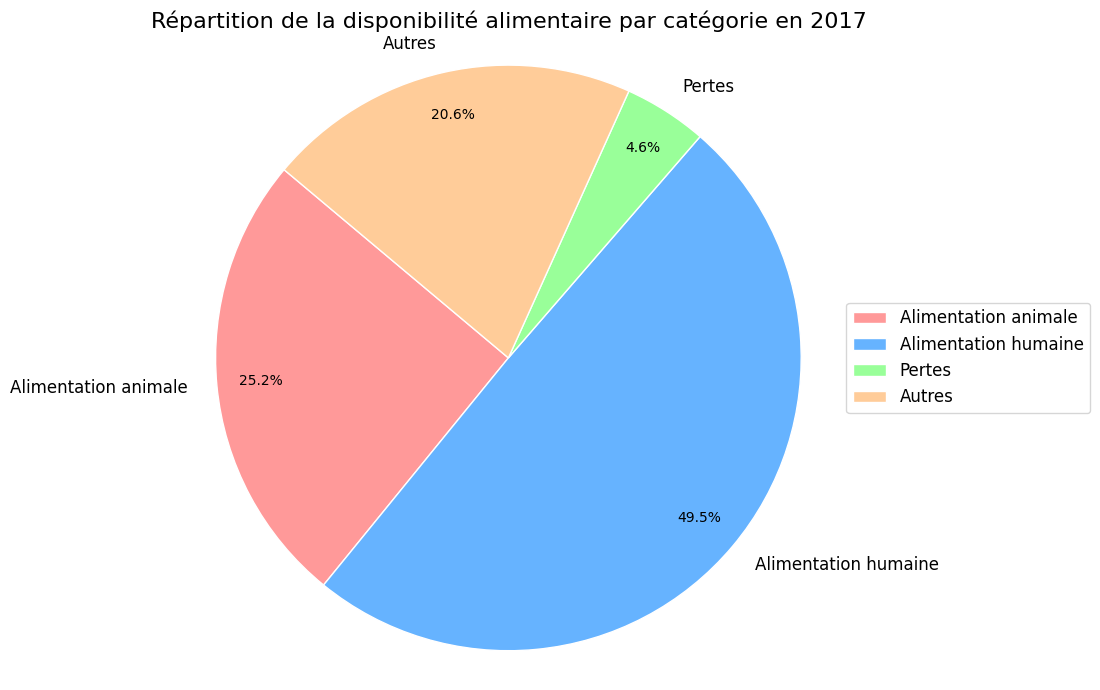

In [40]:
# Calcul des proportions
proportion_aliments_animaux_dispo_total = round((categories['Alimentation animale'] / dispo_total) * 100, 2)
proportion_aliments_humains_dispo_total = round((categories['Alimentation humaine'] / dispo_total) * 100, 2)
proportion_aliments_pertes_dispo_total = round((categories['Pertes'] / dispo_total) * 100, 2)

# Calcul de la catégorie 'Autres'
proportion_autre = 100 - (proportion_aliments_animaux_dispo_total + proportion_aliments_humains_dispo_total + proportion_aliments_pertes_dispo_total)

# Préparation des données pour le camembert
x = [
    proportion_aliments_animaux_dispo_total,
    proportion_aliments_humains_dispo_total,
    proportion_aliments_pertes_dispo_total,
    proportion_autre
]
labels = ['Alimentation animale', 'Alimentation humaine', 'Pertes', 'Autres']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Création du camembert
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(x, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, wedgeprops=dict(edgecolor='w'))

# Ajustement des étiquettes
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')

# Ajout d'un contour autour des sections
for wedge in wedges:
    wedge.set_edgecolor('white')

plt.title("Répartition de la disponibilité alimentaire par catégorie en 2017", fontsize=16)
plt.axis('equal')  # Assure que le camembert est dessiné en cercle

# Déplacement de la légende
plt.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [41]:
#Création d'une liste avec toutes les variables
liste = ['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres']


In [42]:
#Création d'un dataframe avec les informations uniquement pour ces céréales

df_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].isin(liste)]

In [43]:
#Affichage de la proportion d'alimentation animale
Proportion_alim_animale = round((df_cereales['Aliments pour animaux'].sum() / df_cereales['Disponibilité intérieure'].sum()) * 100, 2)
print(Proportion_alim_animale, "% des céréales sont utilisées pour l'alimentation animale en 2017")


36.29 % des céréales sont utilisées pour l'alimentation animale en 2017


In [44]:
#Affichage de la proportion d'alimentation humaine
Proportion_alim_humaine = round((df_cereales['Nourriture'].sum() / df_cereales['Disponibilité intérieure'].sum())* 100, 2)

print(Proportion_alim_humaine ,"%  des céréales sont utilisées pour l'alimentation humaine en 2017")

42.75 %  des céréales sont utilisées pour l'alimentation humaine en 2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [45]:
#Création de la colonne proportion par pays
df_personnes_sous_nutri['proportion par pays'] = round((df_personnes_sous_nutri['sous_nutrition'] / df_personnes_sous_nutri['Population'] * 100),2)


In [46]:
#affichage après trie des 10 pires pays
les10_pire_pays = df_personnes_sous_nutri.sort_values(by = 'proportion par pays', ascending = False)



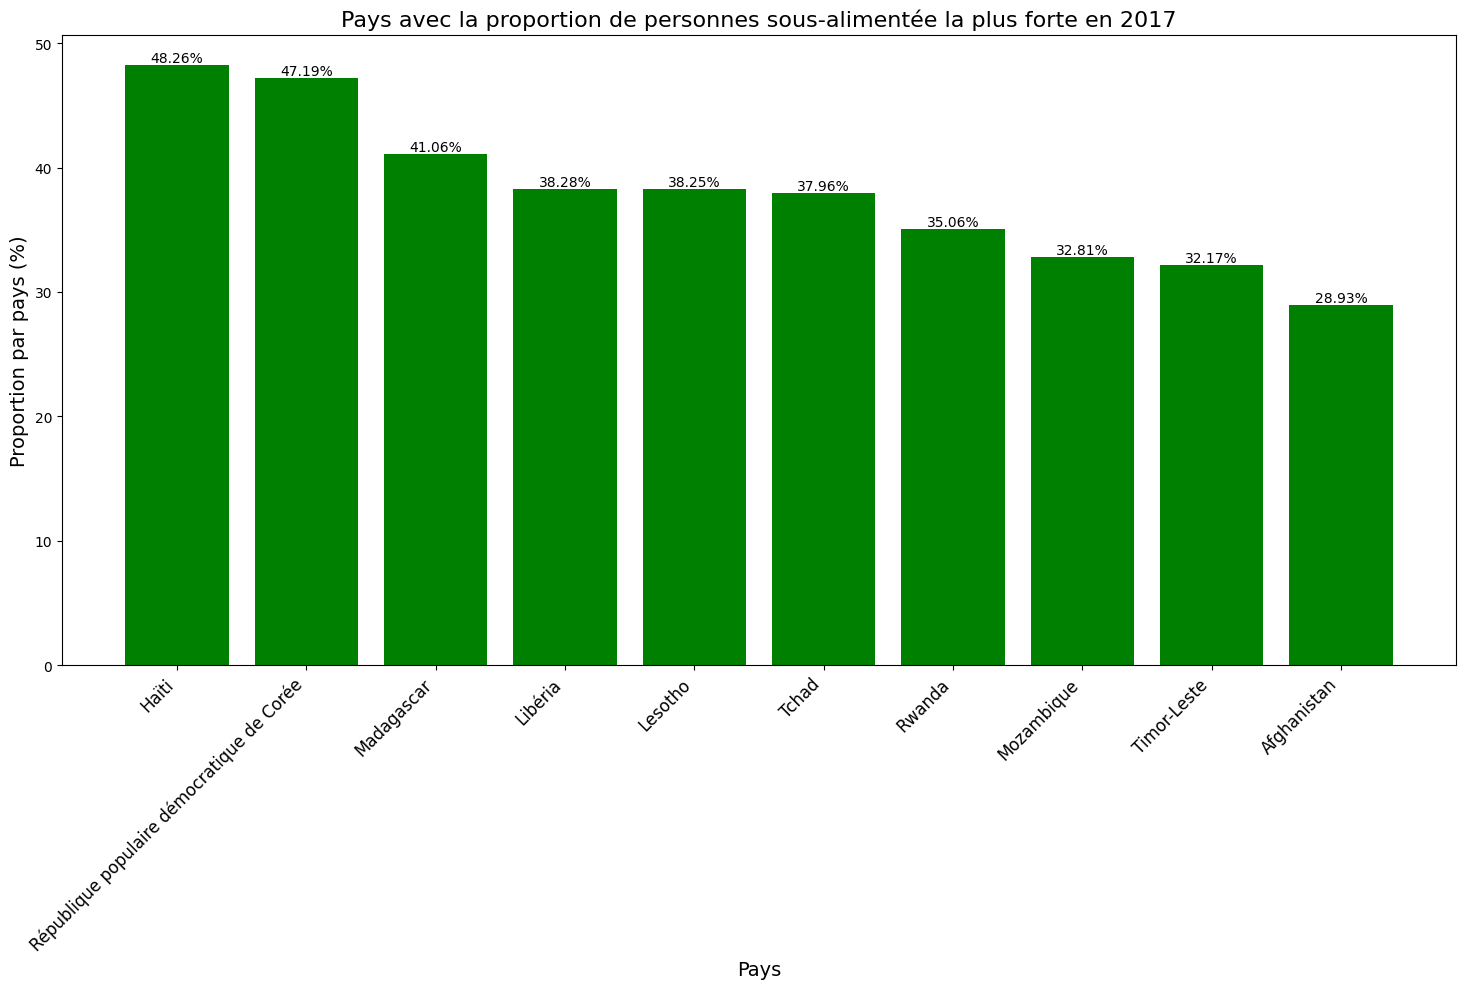

In [47]:
# Afficher les valeurs sur les barres du graphique
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], f'{y[i]:.2f}%', ha='center', va='bottom', fontsize=10)

# Préparation des données
histogram_les10_pire_pays_2017 = les10_pire_pays.reset_index()
histogram_les10_pire_pays_2017 = histogram_les10_pire_pays_2017.iloc[0:10, :]

# Création du graphique à barres
plt.figure(figsize=(15, 10))  # Augmentation de la taille de la figure
plt.bar(
    x=histogram_les10_pire_pays_2017['Zone'],
    height=histogram_les10_pire_pays_2017['proportion par pays'],
    color='green'
)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45, ha='right')

# Ajout des étiquettes
addlabels(histogram_les10_pire_pays_2017['Zone'], histogram_les10_pire_pays_2017['proportion par pays'])

plt.xlabel('Pays', fontsize=14)
plt.ylabel('Proportion par pays (%)', fontsize=14)
plt.title("Pays avec la proportion de personnes sous-alimentée la plus forte en 2017", fontsize=16)
plt.tight_layout()  # Ajustement pour que tout rentre bien dans la figure
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [48]:
# Calcul du total de l'aide alimentaire par pays
df_aide_alimentaire_2013 = aide_alimentaire.loc[aide_alimentaire['Année'] >= 2013]

# Grouper par pays (Zone) et calculer la somme de l'aide alimentaire (Valeur)
les10_pays_avecleplus_aide_alimentaire = df_aide_alimentaire_2013.groupby(by='Zone')['Valeur'].sum()

# Convertir la Series en DataFrame et trier par la valeur totale de l'aide alimentaire de manière décroissante
les10_pays_avecleplus_aide_alimentaire = les10_pays_avecleplus_aide_alimentaire.to_frame().sort_values(by='Valeur', ascending=False)
les10_pays_avecleplus_aide_alimentaire = les10_pays_avecleplus_aide_alimentaire.rename(columns={"Valeur": "aide_kg"})



In [49]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
les10_pays_avecleplus_aide_alimentaire.head(10)


,aide_kg
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


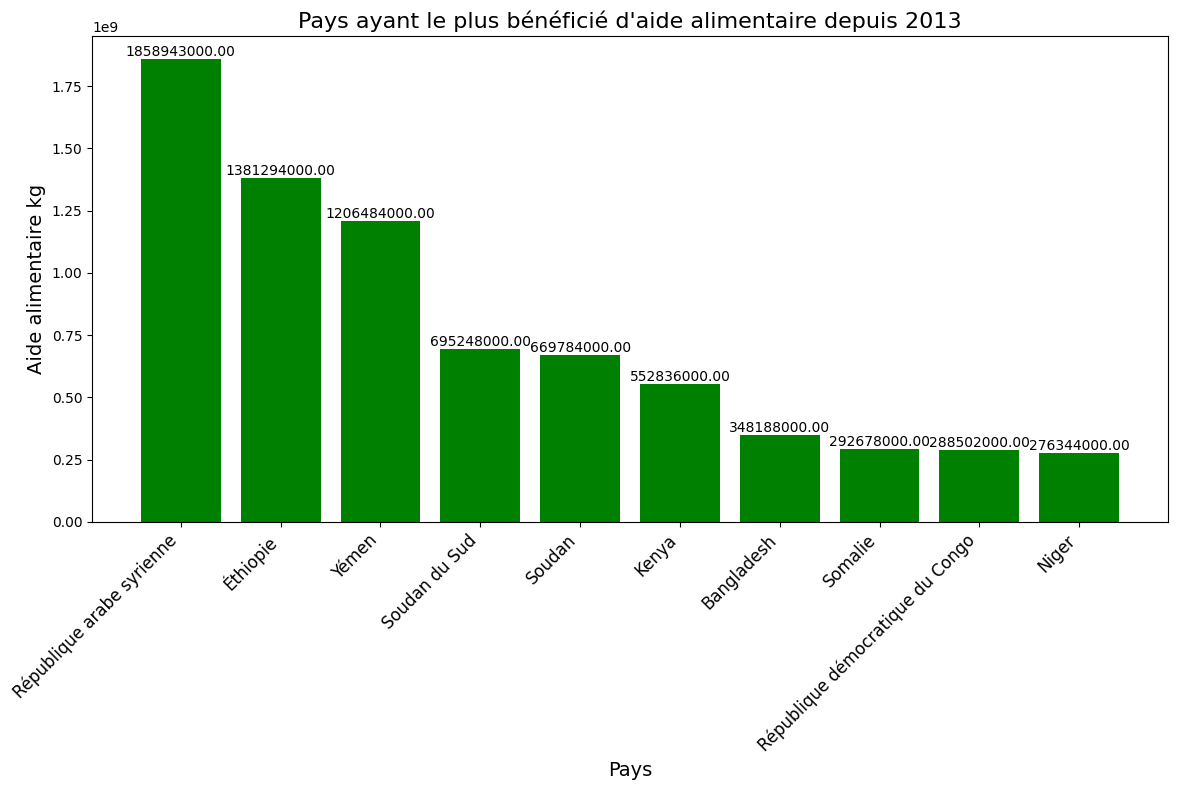

In [50]:
# Afficher les valeurs sur les barres du graphique,
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], f'{y[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Préparation des données
histogram_plus_aide_alimentaire = les10_pays_avecleplus_aide_alimentaire.reset_index()
histogram_plus_aide_alimentaire = histogram_plus_aide_alimentaire.iloc[0:10, :]  # Récupérer les 10 pays qui ont bénéficié le plus d'aide alimentaire depuis 2013

# Création de l'histogramme
plt.figure(figsize=(12, 8))  # Augmentation de la taille de la figure
bars = plt.bar(histogram_plus_aide_alimentaire['Zone'], histogram_plus_aide_alimentaire['aide_kg'], color='green')

# Ajout des étiquettes sur les barres
addlabels(histogram_plus_aide_alimentaire['Zone'], histogram_plus_aide_alimentaire['aide_kg'])

# Personnalisation des axes et du titre
plt.tick_params(axis='x', rotation=45, labelsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Alignement des étiquettes sur la droite
plt.xlabel('Pays', fontsize=14)
plt.ylabel('Aide alimentaire kg', fontsize=14)
plt.title("Pays ayant le plus bénéficié d'aide alimentaire depuis 2013", fontsize=16)

# Ajustement pour que tout rentre bien dans la figure
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [51]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année
df_aide_alimentaire_2013_2016 = aide_alimentaire
df_aide_alimentaire_2013_2016 = df_aide_alimentaire_2013_2016.groupby(by=['Zone','Année']).agg({'Valeur':sum}).reset_index()

In [52]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_pays = ('République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan')

In [53]:
#On filtre sur le dataframe avec notre liste
df_pays_par_annee = df_aide_alimentaire_2013_2016[df_aide_alimentaire_2013_2016['Zone'].isin(liste_pays)]

In [54]:
# Affichage des pays avec l'aide alimentaire par année
df_pays_par_annee = df_pays_par_annee.rename(columns={"Valeur":"aide_kg"})
df_pays_par_annee

,Zone,Année,aide_kg
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [55]:
# Évolution des pays par an

# Calcul de l'évolution en pourcentage
df_pays_par_annee['Evolution'] = round((df_pays_par_annee.groupby('Zone')['aide_kg'].pct_change() * 100), 2)
df_pays_par_annee.fillna(0, inplace=True)

# Formater la colonne Evolution pour afficher les valeurs avec un symbole de pourcentage
df_pays_par_annee['Evolution'] = df_pays_par_annee['Evolution'].astype(str) + '%'

# Affichage du DataFrame
df_pays_par_annee

,Zone,Année,aide_kg,Evolution
157,République arabe syrienne,2013,563566000,0.0%
158,République arabe syrienne,2014,651870000,15.67%
159,République arabe syrienne,2015,524949000,-19.47%
160,République arabe syrienne,2016,118558000,-77.42%
189,Soudan,2013,330230000,0.0%
190,Soudan,2014,321904000,-2.52%
191,Soudan,2015,17650000,-94.52%
192,Soudan du Sud,2013,196330000,0.0%
193,Soudan du Sud,2014,450610000,129.52%
194,Soudan du Sud,2015,48308000,-89.28%


In [56]:
# Calcul de l'évolution totale par pays et tri des valeurs
evolution_par_pays = df_pays_par_annee.copy()
evolution_par_pays['Evolution'] = df_pays_par_annee['Evolution'].str.rstrip('%').astype(float)
evolution_par_pays = evolution_par_pays.groupby(by='Zone')['Evolution'].sum().round(2).sort_values(ascending=False).to_frame()

# Formater la colonne Evolution pour afficher les valeurs avec un symbole de pourcentage
evolution_par_pays['Evolution'] = evolution_par_pays['Evolution'].astype(str) + '%'

# Réindexer pour garder l'alignement avec Zone
evolution_par_pays.reset_index(inplace=True)

# Affichage du DataFrame trié
evolution_par_pays

,Zone,Evolution
0,Yémen,222.81%
1,Soudan du Sud,40.24%
2,Éthiopie,-66.16%
3,République arabe syrienne,-81.22%
4,Soudan,-97.04%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [57]:
#Calcul de la disponibilité en kcal par personne par jour par pays

calories_dispo_jour_pays = df_donnees_population_dispo_alim.groupby(['Zone']).agg({'Disponibilité alimentaire (Kcal/personne/jour)':sum}).sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending = True)

calories_dispo_jour_pays.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)': 'Disponibilité alimentaire (Kcal/personne/jour/pays)'}, inplace=True)

calories_dispo_jour_pays.drop(calories_dispo_jour_pays[calories_dispo_jour_pays['Disponibilité alimentaire (Kcal/personne/jour/pays)'] == 0].index, inplace=True)


In [58]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne

les10pays_moins_dispo_alim = calories_dispo_jour_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour/pays)', ascending=True)
les10pays_moins_dispo_alim.head(10)


,Disponibilité alimentaire (Kcal/personne/jour/pays)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


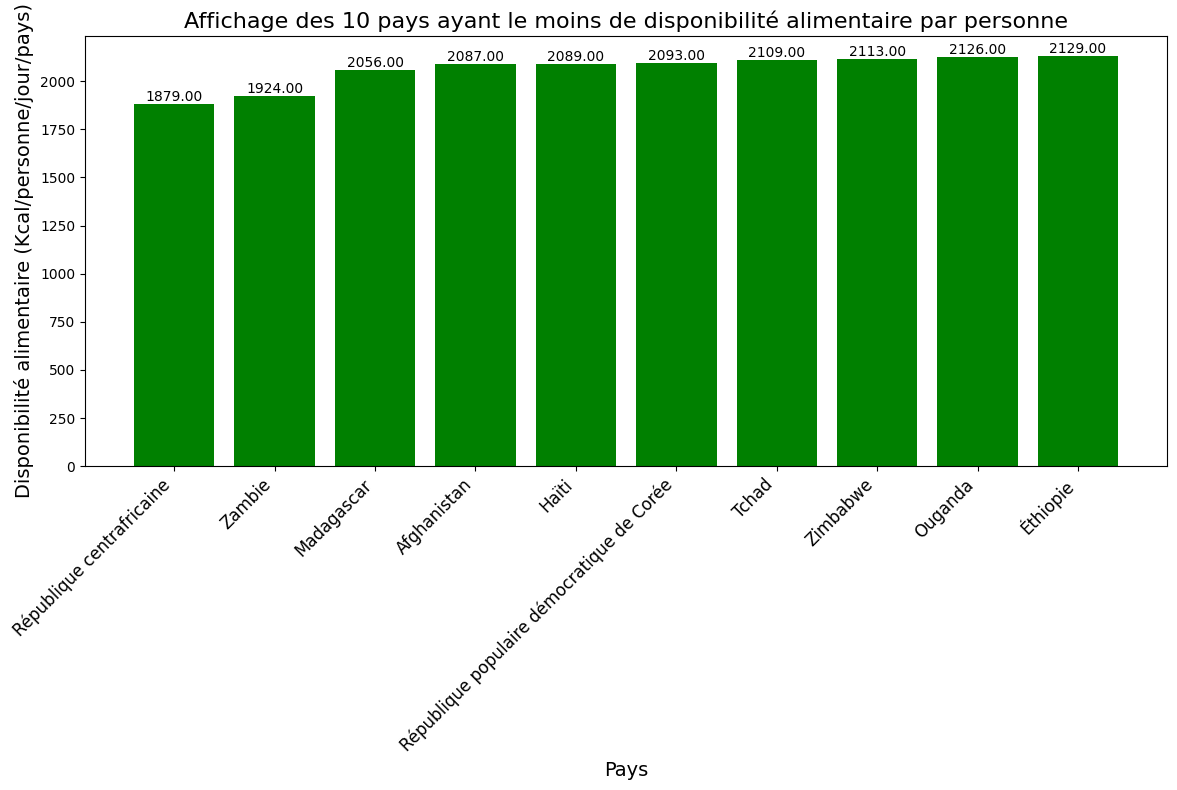

In [59]:
# Fonction pour afficher les valeurs sur les barres du graphique
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], f'{y[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Préparation des données
les10pays_moins_dispo_alim = les10pays_moins_dispo_alim.reset_index()
histogram_les10pays_moins_dispo_alim = les10pays_moins_dispo_alim.iloc[0:10, :]  # Récupérer les 10 pays ayant le moins de disponibilité alimentaire

# Création de l'histogramme
plt.figure(figsize=(12, 8))  # Augmentation de la taille de la figure
bars = plt.bar(histogram_les10pays_moins_dispo_alim['Zone'], histogram_les10pays_moins_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour/pays)'], color='green')

# Ajout des étiquettes sur les barres
addlabels(histogram_les10pays_moins_dispo_alim['Zone'], histogram_les10pays_moins_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour/pays)'])

# Personnalisation des axes et du titre
plt.tick_params(axis='x', rotation=45, labelsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Alignement des étiquettes sur la droite
plt.xlabel('Pays', fontsize=14)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour/pays)', fontsize=14)
plt.title("Affichage des 10 pays ayant le moins de disponibilité alimentaire par personne", fontsize=16)

# Ajustement pour que tout rentre bien dans la figure
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [60]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
calories_dispo_jour_pays.iloc[-10:, :]

,Disponibilité alimentaire (Kcal/personne/jour/pays)
Zone,
Allemagne,3503.0
Égypte,3518.0
Luxembourg,3540.0
Italie,3578.0
Irlande,3602.0
Israël,3610.0
États-Unis d'Amérique,3682.0
Turquie,3708.0
Belgique,3737.0


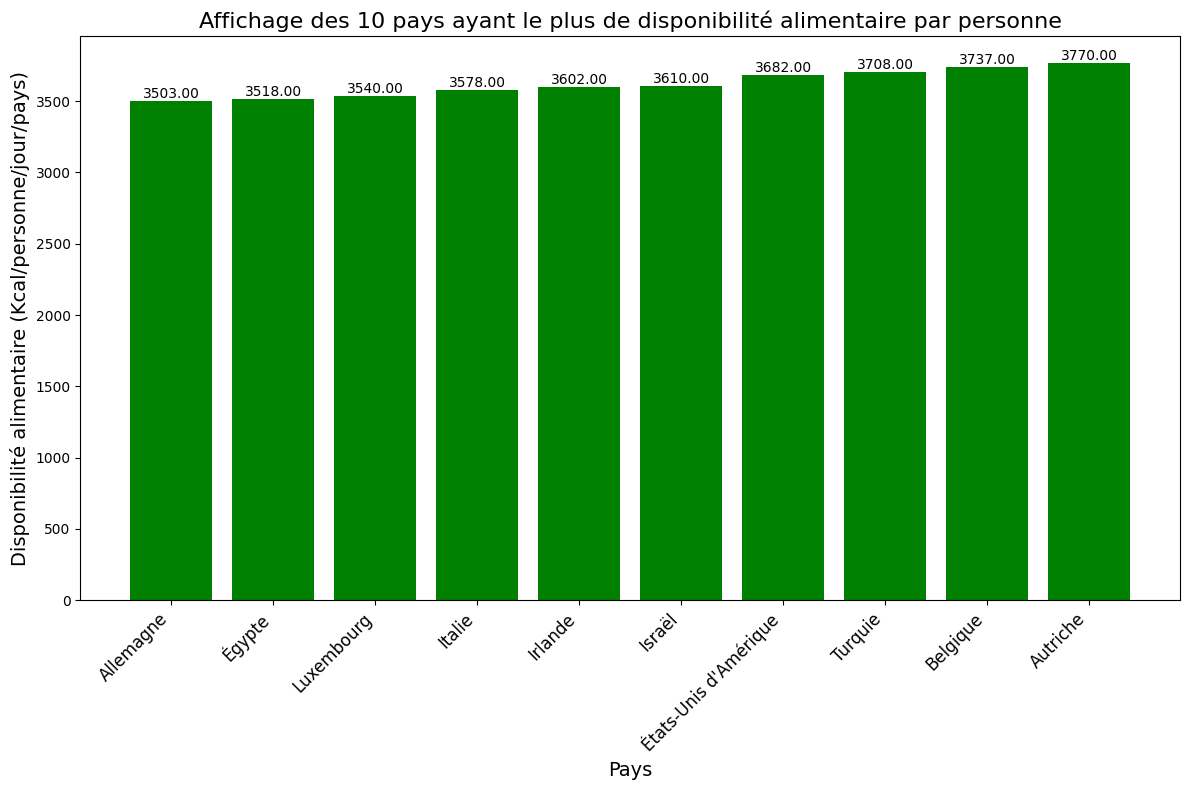

In [61]:
# Afficher les valeurs sur les barres du graphique
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], f'{y[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Préparation des données
histogram_pays_plus_calorie_dispo = calories_dispo_jour_pays.iloc[-10:, :]
histogram_pays_plus_calorie_dispo = histogram_pays_plus_calorie_dispo.reset_index()

# Création de l'histogramme
plt.figure(figsize=(12, 8))  # Augmentation de la taille de la figure
bars = plt.bar(histogram_pays_plus_calorie_dispo['Zone'], histogram_pays_plus_calorie_dispo['Disponibilité alimentaire (Kcal/personne/jour/pays)'], color='green')

# Ajout des étiquettes sur les barres
addlabels(histogram_pays_plus_calorie_dispo['Zone'], histogram_pays_plus_calorie_dispo['Disponibilité alimentaire (Kcal/personne/jour/pays)'])

# Personnalisation des axes et du titre
plt.tick_params(axis='x', rotation=45, labelsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Alignement des étiquettes sur la droite
plt.xlabel('Pays', fontsize=14)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour/pays)', fontsize=14)
plt.title("Affichage des 10 pays ayant le plus de disponibilité alimentaire par personne", fontsize=16)

# Ajustement pour que tout rentre bien dans la figure
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [62]:
# Filtrer les données pour la Thaïlande
thailande_population = df_personnes_sous_nutri[df_personnes_sous_nutri["Zone"] == 'Thaïlande']
thailande_dispo_manioc = dispo_alimentaire[(dispo_alimentaire["Zone"] == "Thaïlande") & (dispo_alimentaire["Produit"] == "Manioc")]


In [63]:
# Calcul de la sous-nutrition en Thaïlande
proportion_sous_nutri_thailande = thailande_population['proportion par pays'].values[0]

# Calcul de la proportion de manioc utilisé pour la nourriture en Thaïlande
nourriture_manioc = round((thailande_dispo_manioc['Nourriture'].values[0] / thailande_dispo_manioc['Production'].values[0]) * 100, 1)

# Affichage des résultats
print(f"{proportion_sous_nutri_thailande:.2f}% de la population thaïlandaise est en sous-nutrition")
print(f"{nourriture_manioc:.1f}% de la production de manioc en thaïlande est utilisée comme nourriture")


8.96% de la population thaïlandaise est en sous-nutrition
2.9% de la production de manioc en thaïlande est utilisée comme nourriture


In [64]:
# On calcule la proportion exportée en fonction de la proportion

# Extraction des données scalaires
exportation_manioc = thailande_dispo_manioc['Exportations - Quantité'].values[0]
production_manioc = thailande_dispo_manioc['Production'].values[0]

# Calcul de la proportion de manioc exportée
proportion_export_manioc = round((exportation_manioc / production_manioc) * 100, 1)

# Affichage des résultats
print(f"{production_manioc:,} kg de manioc produit en Thaïlande")
print(f"{exportation_manioc:,} kg de manioc exporté de Thaïlande")
print(f"{proportion_export_manioc:.1f}% de la production de manioc est exportée")



30,228,000,000.0 kg de manioc produit en Thaïlande
25,214,000,000.0 kg de manioc exporté de Thaïlande
83.4% de la production de manioc est exportée


In [65]:
# Disponibilité alimentaire par habitant en Thaïlande
calories_dispo_jour_pays = calories_dispo_jour_pays.reset_index()
calories_dispo_jour_pays.loc[calories_dispo_jour_pays['Zone']=='Thaïlande']

,Zone,Disponibilité alimentaire (Kcal/personne/jour/pays)
81,Thaïlande,2785.0
